In [73]:
# Importando Bibliotecas
# Importando Bibliotecas
from math import pi
import matplotlib.pyplot as plt
import numpy as np



# APS 1 - Transferência de Calor e Mecânica dos Sólidos

### Roteiro de Atividade:

**1.** Aplique os conceitos do **método das diferenças finitas** na equação diferencial do problema para definir 
uma equação de diferença algébrica associada aos nós da aleta. Considere para a segunda derivada da 
temperatura no espaço uma equação de `diferença finita centrada` e para a primeira derivada no tempo 
da temperatura uma equação de `diferença progressiva`. Apresente o desenvolvimento das equações.


O problema se trata de condução unidimensional, com condutividade térmica constante e sem geração de energia no interior do corpo, e a equação diferencial é dada por:
*equação diferencial*

Para a segunda derivada no espaço, usamos a diferença finita centrada:
*equação da diferença finita centrada*

E para representar a derivada no tempo, usamos a diferença progressiva:
*equação da diferença progressiva*

Juntando as equações e manipulando a equação resultante, temos:
*manipulação na equação*


**2.** Apresente  um  gráfico  (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎×𝑝𝑜𝑠𝑖çã𝑜)  após  obter  o  regime  permanente.  Use  uma tolerância de 𝑡𝑜𝑙=1e-10. Considere que a aleta, de comprimento 𝐿=300𝑚𝑚 , densidade de 2700 𝑘𝑔/𝑚³,  condutividade  térmica  de 180 𝑊(𝑚𝐾) e  calor  específico 896 𝐽/(𝑘𝑔𝐾), tem  a temperatura especificada na extremidade de 𝑇(𝐿)=25°C. A aleta está em contato com uma base a Tb = 100°C em um ambiente a Tinf = 50°C e h = 50𝑊/𝑚2𝐾. Para a condição de estabilidade do procedimento numérico use:
*equação de delta_T*


- Declrando as variáveis:

In [74]:
# Tolerância:
tol = 1e-10

# Comprimento:
L = 300e-3        # 300 mm

# Raio da aleta:
r = 3e-3          # 3 mm

# Densidade:
ro = 2700         # kg/m3

# Condutividade térmica:
k = 180           # W/mK

# Coeficiente de transferência de calor por convecção natural
h = 50            # W/m2K

# Calor específico:
c = 896           # J/kgK

# Temperatura da base:
Tb = 100          # °C

# Temperatura na extremidade:
TL = 25           # °C

# Temperatura ambiente:
Tinf = 50         # °C


## DADOS DO MODELO NUMÉRICO:

# Variação em x:
delta_x = 1e-3    # m

# Tempo de Simulação inicial:
tempo = 10000       # número de incrementos

- Alguns sub cálculos de variáveis secundárias:

In [75]:
# Perímetro:
P = 2 * pi * r    # m

# Área de sessão transversal:
Atr = pi * r**2   # m2

# Número de divisões do tamanho da aleta:
n = int(L/delta_x) + 1

# Variação mínima temporal:
delta_t = delta_x**2/((k/(ro*c))*(((h*P*delta_x**2)/(k*Atr))+2))
delta_t -= delta_t/10
print(delta_t)

0.00604744005184705


- Gerando a matriz tempo por temperatura em x:

In [76]:
TM = np.zeros((tempo, n))

TM[:,0] = Tb
TM[:,n-1] = TL

- Realizando as iterações no tempo:

In [77]:
for l in range(0, tempo-1):
    for i in range(1, n-1):
        termo_1 = (TM[l,i+1] - 2*TM[l,i] + TM[l, i-1])/delta_x**2
        termo_2 = (h*P*(TM[l,i]-Tinf))/(k*Atr)
        TM[l+1,i] = TM[l,i] + ((k*delta_t*(termo_1 - termo_2))/(ro*c))

print(TM[-1,:])

[100.          99.0935458   98.19625824  97.30804637  96.42882091
  95.55849416  94.69698002  93.84419394  93.00005288  92.16447527
  91.337381    90.51869139  89.70832912  88.90621824  88.11228414
  87.32645347  86.54865418  85.77881544  85.01686762  84.26274227
  83.51637211  82.77769095  82.04663371  81.32313637  80.60713596
  79.8985705   79.19737902  78.50350149  77.81687882  77.13745284
  76.46516624  75.79996258  75.14178628  74.49058253  73.84629733
  73.20887745  72.5782704   71.95442439  71.33728835  70.72681189
  70.12294526  69.52563936  68.93484569  68.35051636  67.77260405
  67.20106199  66.63584396  66.07690426  65.52419768  64.97767949
  64.43730546  63.90303177  63.37481505  62.85261236  62.33638113
  61.82607922  61.32166483  60.82309652  60.3303332   59.84333411
  59.3620588   58.88646713  58.41651924  57.95217556  57.49339677
  57.0401438   56.59237786  56.15006034  55.71315289  55.28161735
  54.85541576  54.43451037  54.01886359  53.60843801  53.20319638
  52.80310

- Plotando o gráfico

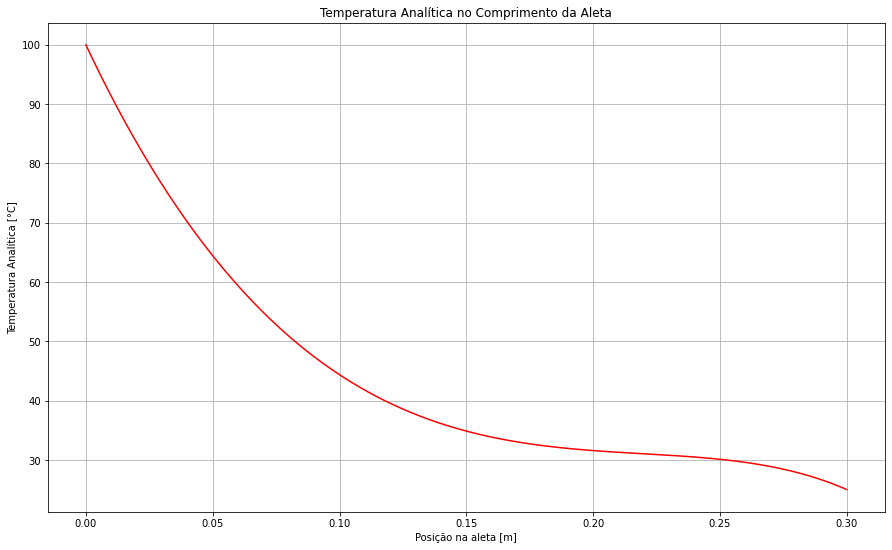

In [78]:
plt.figure(figsize=(15, 9))
plt.plot(np.arange(0, L+delta_x, delta_x), TM[tempo-1,:], 'r')
plt.title("Temperatura Analítica no Comprimento da Aleta")
plt.xlabel("Posição na aleta [m]")
plt.ylabel("Temperatura Analítica [°C]")
plt.grid()
plt.show()